In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

2024-03-10 22:21:47.601355: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 22:21:49.267529: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 22:21:53.728830: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 22:22:21.847607: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import tensorflow_hub

In [4]:
model=tensorflow_hub.KerasLayer("/media/borno/SOFTWERE AND BOOKS/MICROCONTROLLER_DETECTION/Model-2")

In [5]:
import numpy as np

In [111]:
# Generate random data in the range [0, 255]
img = np.random.randint(0, 256, size=(1, 128, 128, 3), dtype=np.uint8)

# Convert the data to tf.uint8 explicitly
img_uint8 = tf.constant(img, dtype=tf.uint8)

# Pass the data to the model
output = model(img_uint8)
print(output)

{'raw_detection_boxes': <tf.Tensor: shape=(1, 49104, 4), dtype=float32, numpy=
array([[[ 0.72814214,  0.46167547,  0.7281436 ,  0.46167547],
        [ 0.00486681,  0.04798012,  0.029558  ,  0.07119095],
        [-0.03646266, -0.04844718,  0.02984016,  0.03921589],
        ...,
        [ 0.22816485,  0.58780587,  1.2615724 ,  1.146438  ],
        [ 0.08959568,  0.44324118,  1.4376632 ,  1.1575496 ],
        [-0.08106846,  0.25255626,  1.6315632 ,  1.253912  ]]],
      dtype=float32)>, 'detection_multiclass_scores': <tf.Tensor: shape=(1, 100, 90), dtype=float32, numpy=
array([[[0.01546999, 0.00317756, 0.00346184, ..., 0.01214501,
         0.00452238, 0.00500803],
        [0.01594479, 0.00548942, 0.00465752, ..., 0.01328613,
         0.00579809, 0.0084348 ],
        [0.01546999, 0.00317756, 0.00346184, ..., 0.01214501,
         0.00452238, 0.00500803],
        ...,
        [0.00513784, 0.00129954, 0.00166042, ..., 0.00416422,
         0.00144576, 0.00190806],
        [0.00630819, 0.001012

In [6]:
import matplotlib.pyplot as plt
import yaml
from box import ConfigBox
import cv2

In [7]:
from constants import *

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


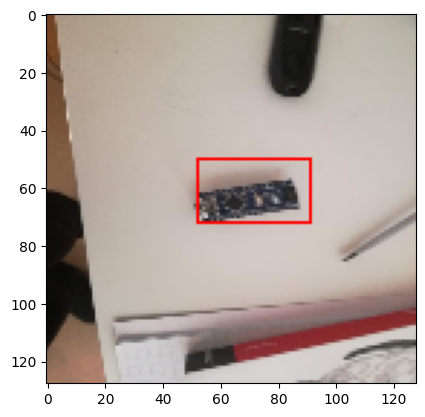

In [23]:
image=cv2.imread("/media/borno/SOFTWERE AND BOOKS/MICROCONTROLLER_DETECTION/IMG_20181228_101826.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(128,128))
image=np.expand_dims(image,axis=0)
image=np.array(image)
image=image/255
output=model(image)
label=np.argmax(output[0])
print(label)
xmin=int(output[1][0][0])
ymin=int(output[1][0][1])
xmax=int(output[1][0][2])
ymax=int(output[1][0][3])
image=cv2.rectangle(image[0],(xmin,ymin),(xmax,ymax),(255,0,0),thickness=1)
plt.imshow(image)

In [31]:
from constants import *

In [33]:
label=classes
label

PosixPath('classes.yaml')

In [34]:
from utils import read_yaml

In [51]:
class show_classes:
    def __init__(self,class_filepath=classes):
        self.cls=read_yaml(class_filepath)
    def show(self,image_path):
        image=cv2.imread(image_path)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image=cv2.resize(image,(128,128))
        image=np.expand_dims(image,axis=0)
        image=np.array(image)
        image=image/255
        output=model(image)
        label=np.argmax(output[0])
        xmin=int(output[1][0][0])
        ymin=int(output[1][0][1])
        xmax=int(output[1][0][2])
        ymax=int(output[1][0][3])
        image=cv2.rectangle(image[0],(xmin,ymin),(xmax,ymax),(255,0,0),thickness=1)
        image = cv2.putText(image, self.cls.labels[label], (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (255, 0, 0), 1, cv2.LINE_AA)
        print(self.cls.labels[label])
        plt.imshow(image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Arduino_Nano


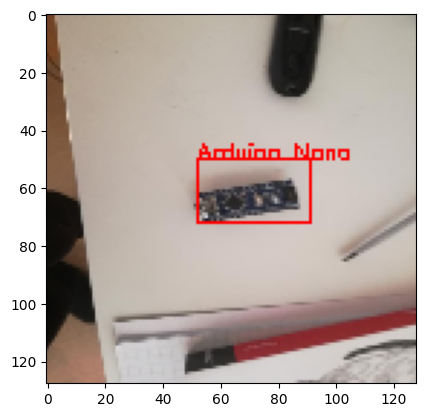

In [55]:

show_classes().show(image_path='/media/borno/SOFTWERE AND BOOKS/MICROCONTROLLER_DETECTION/IMG_20181228_101826.jpg')

In [58]:
from PIL import Image

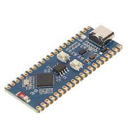

In [61]:
image=Image.open('/media/borno/SOFTWERE AND BOOKS/MICROCONTROLLER_DETECTION/images.jpeg')
image=image.resize((128,128))
image